### Install libraries

In [2]:
import pandas as pd
import numpy as np
!pip install saspy
import saspy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

## Data from CDC Behavioral Risk Factor Surveillance System

The 2017 BRFSS data continues to reflect the changes initially made in 2011 in weighting methodology (raking) and the addition of cell phone only respondents. The aggregate BRFSS combined landline and cell phone dataset is built from the landline and cell phone data submitted for 2017 and includes data for 50 states, the District of Columbia, Guam, and Puerto Rico.

There are 450,016 records for 2017.

The website is: https://www.cdc.gov/brfss/annual_data/annual_2017.html

Codebook for all variables is here: https://www.cdc.gov/brfss/annual_data/2017/pdf/codebook17_llcp-v2-508.pdf

Codebook for calculated variables is here: https://www.cdc.gov/brfss/annual_data/2017/pdf/codebook17_llcp-v2-508.pdf

In [3]:
data = pd.read_sas(r'C:\Users\Nick\Desktop\GitProjects\LLCP2017XPT\LLCP2017.xpt', format='xport')
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01302017',b'01',b'30',b'2017',1100.0,b'2017000001',2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,b'01122017',b'01',b'12',b'2017',1100.0,b'2017000002',2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,b'01102017',b'01',b'10',b'2017',1100.0,b'2017000003',2.017000e+09,1.0,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0
3,1.0,1.0,b'02082017',b'02',b'08',b'2017',1200.0,b'2017000004',2.017000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
4,1.0,1.0,b'01302017',b'01',b'30',b'2017',1100.0,b'2017000005',2.017000e+09,1.0,...,3.0,2.0,2.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0


In [4]:
data.shape

(450016, 358)

### Variables and coding info

___STATE__ 

(US state: 1-72; MA=#25)

___PRACE1__ 

(race: 1=White, 2= Black, 3=Native American/Alaskan, 4=Asian, 5=Native Hawaiian/Pacific Islander, 6=other, 7=no preferred race, 8=multi-racial, but chose not to select other race, 77=don't know, 99=refused)

___AGE_G__

(1=18-24, 2=25-34, 3=35-44, 4=45-54, 5=55-64, 6=65+)

___BMI5CAT__

(BMI: 1= underweight, 2=normal weight, 3=overweight, 4=obese, .=don't know/refused)

_Body Mass Index_

__CHILDREN__ 

(1-87, 88=None, 99=refused/missing)

_# of children in household?_

___EDUCAG__ 

(edu: 1=<HS, 2=HS, 3=Attended College/Tech school, 4=Graduated College/Tech, 9=don't know/missing/refused)

_Education level_

___INCOMG__ 

(1=<15k, 2=15-25k, 3=25-35k, 4=35-50k, 5=50k+, 9=don't know/missing/refused)

_Income level_

___DRNKWEK__ 

(0=no drinks, 1-999+=number of drinks per week, 99900=don't know/refused/missing)

_# alcoholic drinks per week?_

__DRNK3GE5__

(1-76, 88=None, 77=don't know, 99=refused)

_"Considering all types of alcoholic beverages, how many times during the past 30 days did you have 5 or more drinks for men or 4 or more drinks for women on an occasion?_

___RFDRHV5__ 

(1=no, 2=yes, 9=don't know/missing/refused)

_Heavy alcohol consumption?_

___PACAT1__

(1=highly active, 2=active, 3=insufficiently active, 4=inactive, 9=don't know/refused/missing)

_Physical activity level_

__PA1MIN___

(0-99999)

_"Minutes of total physical activity per week?"_

__EXERANY2__

(1=Yes, 2=No, 7=dont' know, 9=refused)

_"During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?_

___RFHLTH__

(1=good or better, 2=fair or poor, 9=don't know/missing, refused)

_General health status?_

___VEGESU1__

(1-99998)

_"Total vegetables consumed each day?"_

__ADSLEEP__

(1-14, 88=None, 77=don't know, 99=Missing)

_"Over the last 2 weeks, how many days have you had trouble falling asleep or staying asleep or sleeping too much?"_

___HCVU651__

(1=have, 2=don't have, 9=don't know, missing, refused)

_"Do you have access to healthcare?"_

__EMPLOY1__

(1=Employed, 2=Self-Employed, 3=Unemployed 1+yrs, 4=Unemployed <1yr, 5=Homemaker, 6=Student, 7=Retired, 8=Unable to work, 9=refused)

_Employment_

__VETERAN3__

(1=Yes, 2=No, 7=don't know, 9=refused)

_"Have you ever served on active duty in the United States Armed Forces, either in the regular military or in a National Guard or military reserve unit?"_

__MARITAL__

(1=Married, 2=Divorced, 3=Widowed, 4=Separated, 5=Never Married, 6=Coupled, not married, 9=Refused)

_"What is your marital status?"_

__MARIJANA__

(1-30, 88=none, 77=don't know, 99=missing)

_"During the past  30  days, on how many days did you use marijuana or hashish?_

__ADDEPEV2__

(1=yes, 2=no, 7=don't know, 9=refused)

_"(Ever told) you have a depressive disorder (including depression, major depression, dysthymia, or minor depression)?"_

__CIMEMLOS__

(1=Yes, 2=No, 7=don't know, 9=missing)

_"During the past 12 months, have you experienced confusion or memory loss that is happening more often or is getting worse?"_

__LSATISFY__

(1=Very Satisfied, 2=Satisfied, 3=Disatisfied, 4=Very Disatisfied, 7=don't know, 9=refused)

_"In general, how satisfied are you with your life?

__FIREARM4__

(1=Yes, 2=No, 7=don't know, 9=refused)

_"Are any firearms kept in or around your home?"_

__POORHLTH__

(1-30 days not good, 77=Unsure, 88=no days bad, 99=missing)

_"During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?"

__PHYSHLTH__

(1-30 days not good, 77=Unsure, 88=no days bad, 99=missing)

_"Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?"_

__MENTHLTH__

(1-30 days not good, 77=Unsure, 88=no days bad, 99=missing)

_"Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?"_

### Create subset including only the variables listed above:

In [5]:
LLCP=data[['_STATE','_PRACE1', '_AGE_G', '_BMI5CAT', 'CHILDREN', '_EDUCAG', '_INCOMG', '_DRNKWEK', 'DRNK3GE5', 
           '_RFDRHV5', '_PACAT1', 'PA1MIN_', 'EXERANY2', '_RFHLTH', '_VEGESU1', 'ADSLEEP', '_HCVU651', 
           'EMPLOY1', 'VETERAN3', 'MARITAL', 'MARIJANA', 'ADDEPEV2', 'CIMEMLOS', 'LSATISFY', 'FIREARM4',
           'POORHLTH', 'PHYSHLTH', 'MENTHLTH']]

LLCP.head(20)

,_STATE,_PRACE1,_AGE_G,_BMI5CAT,CHILDREN,_EDUCAG,_INCOMG,_DRNKWEK,DRNK3GE5,_RFDRHV5,...,VETERAN3,MARITAL,MARIJANA,ADDEPEV2,CIMEMLOS,LSATISFY,FIREARM4,POORHLTH,PHYSHLTH,MENTHLTH
0,1.0,1.0,6.0,3.0,88.0,4.0,4.0,5.397605e-79,NaN,1.0,...,1.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,88.0,88.0
1,1.0,1.0,6.0,3.0,88.0,4.0,5.0,5.397605e-79,NaN,1.0,...,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,88.0,88.0
2,1.0,1.0,6.0,3.0,88.0,1.0,9.0,1.000000e+02,88.0,1.0,...,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,88.0,88.0
3,1.0,1.0,6.0,3.0,88.0,1.0,1.0,5.397605e-79,NaN,1.0,...,2.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,88.0,88.0
4,1.0,1.0,6.0,2.0,88.0,1.0,1.0,5.397605e-79,NaN,1.0,...,2.0,3.0,NaN,2.0,NaN,NaN,NaN,14.0,14.0,88.0
5,1.0,1.0,6.0,3.0,88.0,2.0,2.0,6.000000e+02,88.0,1.0,...,1.0,3.0,NaN,2.0,NaN,NaN,NaN,88.0,6.0,88.0
6,1.0,1.0,6.0,3.0,88.0,3.0,5.0,5.397605e-79,NaN,1.0,...,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,88.0,88.0
7,1.0,1.0,6.0,NaN,88.0,2.0,9.0,5.397605e-79,NaN,1.0,...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,88.0,88.0
8,1.0,1.0,6.0,2.0,88.0,2.0,3.0,5.397605e-79,NaN,1.0,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,88.0,88.0,25.0
9,1.0,1.0,4.0,3.0,1.0,2.0,4.0,6.000000e+02,88.0,1.0,...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,88.0,2.0,1.0


In [6]:
LLCP.dtypes

_STATE      float64
_PRACE1     float64
_AGE_G      float64
_BMI5CAT    float64
CHILDREN    float64
_EDUCAG     float64
_INCOMG     float64
_DRNKWEK    float64
DRNK3GE5    float64
_RFDRHV5    float64
_PACAT1     float64
PA1MIN_     float64
EXERANY2    float64
_RFHLTH     float64
_VEGESU1    float64
ADSLEEP     float64
_HCVU651    float64
EMPLOY1     float64
VETERAN3    float64
MARITAL     float64
MARIJANA    float64
ADDEPEV2    float64
CIMEMLOS    float64
LSATISFY    float64
FIREARM4    float64
POORHLTH    float64
PHYSHLTH    float64
MENTHLTH    float64
dtype: object

In [7]:
LLCP.isnull().sum()

_STATE           0
_PRACE1          5
_AGE_G           0
_BMI5CAT     36446
CHILDREN        15
_EDUCAG          0
_INCOMG          0
_DRNKWEK         0
DRNK3GE5    229909
_RFDRHV5         0
_PACAT1          0
PA1MIN_     156652
EXERANY2     33153
_RFHLTH          0
_VEGESU1     47460
ADSLEEP     400082
_HCVU651         0
EMPLOY1          6
VETERAN3        11
MARITAL          7
MARIJANA    386565
ADDEPEV2         3
CIMEMLOS    432453
LSATISFY    430424
FIREARM4    432191
POORHLTH    212699
PHYSHLTH         1
MENTHLTH         1
dtype: int64

In [8]:
LLCP.describe()

,_STATE,_PRACE1,_AGE_G,_BMI5CAT,CHILDREN,_EDUCAG,_INCOMG,_DRNKWEK,DRNK3GE5,_RFDRHV5,...,VETERAN3,MARITAL,MARIJANA,ADDEPEV2,CIMEMLOS,LSATISFY,FIREARM4,POORHLTH,PHYSHLTH,MENTHLTH
count,450016.000000,450011.000000,450016.000000,413570.000000,450001.000000,450016.000000,450016.000000,4.500160e+05,220107.000000,450016.000000,...,450005.000000,450009.000000,63451.000000,450013.000000,17563.000000,19592.000000,17825.000000,237317.000000,450015.000000,450015.000000
mean,28.816780,3.588079,4.416081,2.965991,65.852845,2.979292,4.624678,6.939471e+03,66.649380,1.590866,...,1.882212,2.316794,83.856078,1.827374,1.939646,1.603920,2.011557,54.968388,60.014571,63.567452
std,15.813072,14.036208,1.583006,0.829725,37.731468,1.035973,2.361981,2.488882e+04,36.514008,1.999338,...,0.433243,1.720470,17.272721,0.557494,0.592345,0.812855,1.856372,38.225797,37.247246,36.219920
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,17.000000,1.000000,3.000000,2.000000,4.000000,2.000000,3.000000,5.397605e-79,30.000000,1.000000,...,2.000000,1.000000,88.000000,2.000000,2.000000,1.000000,1.000000,10.000000,15.000000,20.000000
50%,27.000000,1.000000,5.000000,3.000000,88.000000,3.000000,5.000000,2.300000e+01,88.000000,1.000000,...,2.000000,1.000000,88.000000,2.000000,2.000000,2.000000,2.000000,88.000000,88.000000,88.000000
75%,41.000000,1.000000,6.000000,4.000000,88.000000,4.000000,5.000000,4.000000e+02,88.000000,1.000000,...,2.000000,3.000000,88.000000,2.000000,2.000000,2.000000,2.000000,88.000000,88.000000,88.000000
max,72.000000,99.000000,6.000000,4.000000,99.000000,9.000000,9.000000,9.990000e+04,99.000000,9.000000,...,9.000000,9.000000,99.000000,9.000000,9.000000,9.000000,9.000000,99.000000,99.000000,99.000000


### Replace all "don't know/refused/missing" values with NaN

In [9]:
LLCP['_PRACE1'].replace(77, np.nan, inplace=True)
LLCP['_PRACE1'].replace(99, np.nan, inplace=True)

C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
LLCP['_BMI5CAT'].replace('.', np.nan, inplace=True)

In [11]:
LLCP['CHILDREN'].replace(88, 0, inplace=True)
LLCP['CHILDREN'].replace(99, np.nan, inplace=True)

In [12]:
LLCP.CHILDREN.unique()

array([ 0.,  1.,  3.,  2.,  4., nan,  5.,  6.,  8., 10.,  9.,  7., 17.,
       12., 13., 11., 15., 72., 14., 16., 23.])

#### As seen above, someone reported having 72 children. Although not entirely impossible, this seems like a "joke response", so drop that value too. The '23' also seems high, but who knows?

In [13]:
LLCP['CHILDREN'].replace(72, np.nan, inplace=True)

In [14]:
LLCP['_EDUCAG'].replace(9, np.nan, inplace=True)

In [15]:
LLCP['_INCOMG'].replace(9, np.nan, inplace=True)

In [16]:
LLCP['_DRNKWEK'].replace(99900, np.nan, inplace=True)

In [17]:
LLCP.DRNK3GE5.unique()

array([nan, 88.,  1., 77.,  3.,  2., 15.,  5.,  4.,  8., 30., 10.,  7.,
       20., 99., 25.,  6., 18., 12., 21., 14., 24., 28., 29., 13.,  9.,
       27., 16., 17., 23., 26., 19., 11., 22., 76., 40., 48., 31., 36.,
       38., 32., 50., 60.])

In [18]:
LLCP['DRNK3GE5'].replace(88, 0, inplace=True)
LLCP['DRNK3GE5'].replace(77, np.nan, inplace=True)
LLCP['DRNK3GE5'].replace(99, np.nan, inplace=True)

In [19]:
LLCP['_RFDRHV5'].replace(9, np.nan, inplace=True)

In [20]:
LLCP['_PACAT1'].replace(9, np.nan, inplace=True)

In [21]:
LLCP['EXERANY2'].replace(7, np.nan, inplace=True)
LLCP['EXERANY2'].replace(9, np.nan, inplace=True)

In [22]:
LLCP['_RFHLTH'].replace(9, np.nan, inplace=True)

In [23]:
LLCP['ADSLEEP'].replace(88, 0, inplace=True)
LLCP['ADSLEEP'].replace(77, np.nan, inplace=True)
LLCP['ADSLEEP'].replace(99, np.nan, inplace=True)

In [24]:
LLCP['_HCVU651'].replace(9, np.nan, inplace=True)

In [25]:
LLCP['EMPLOY1'].replace(9, np.nan, inplace=True)

In [26]:
LLCP['VETERAN3'].replace(7, np.nan, inplace=True)
LLCP['VETERAN3'].replace(9, np.nan, inplace=True)

In [27]:
LLCP['MARITAL'].replace(9, np.nan, inplace=True)

In [28]:
LLCP['MARIJANA'].replace(88, 0, inplace=True)
LLCP['MARIJANA'].replace(77, np.nan, inplace=True)
LLCP['MARIJANA'].replace(99, np.nan, inplace=True)

In [29]:
LLCP['ADDEPEV2'].replace(2, 0, inplace=True)
LLCP['ADDEPEV2'].replace(7, np.nan, inplace=True)
LLCP['ADDEPEV2'].replace(9, np.nan, inplace=True)

In [30]:
LLCP['CIMEMLOS'].replace(7, np.nan, inplace=True)
LLCP['CIMEMLOS'].replace(9, np.nan, inplace=True)

In [31]:
LLCP['LSATISFY'].replace(7, np.nan, inplace=True)
LLCP['LSATISFY'].replace(9, np.nan, inplace=True)

In [32]:
LLCP['FIREARM4'].replace(7, np.nan, inplace=True)
LLCP['FIREARM4'].replace(9, np.nan, inplace=True)

In [33]:
LLCP['POORHLTH'].replace(88, 0, inplace=True)
LLCP['POORHLTH'].replace(77, np.nan, inplace=True)
LLCP['POORHLTH'].replace(99, np.nan, inplace=True)

In [34]:
LLCP['PHYSHLTH'].replace(88, 0, inplace=True)
LLCP['PHYSHLTH'].replace(77, np.nan, inplace=True)
LLCP['PHYSHLTH'].replace(99, np.nan, inplace=True)

In [35]:
LLCP['MENTHLTH'].replace(88, 0, inplace=True)
LLCP['MENTHLTH'].replace(77, np.nan, inplace=True)
LLCP['MENTHLTH'].replace(99, np.nan, inplace=True)

C:\Users\Nick\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Nick\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


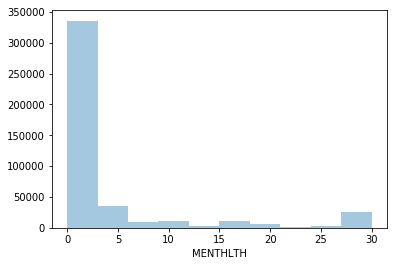

In [36]:
sns.distplot(LLCP['MENTHLTH'], kde=False, bins=10);

In [37]:
plt.scatter(LLCP_NoNaN.MENTHLTH, LLCP_NoNaN.ADSLEEP, color='blue')
plt.title("Scatterplot of Mental Health vs Physical Health")
plt.xlabel("Mental Health")
plt.ylabel("Physical Health")
plt.show()

NameError: name 'LLCP_NoNaN' is not defined

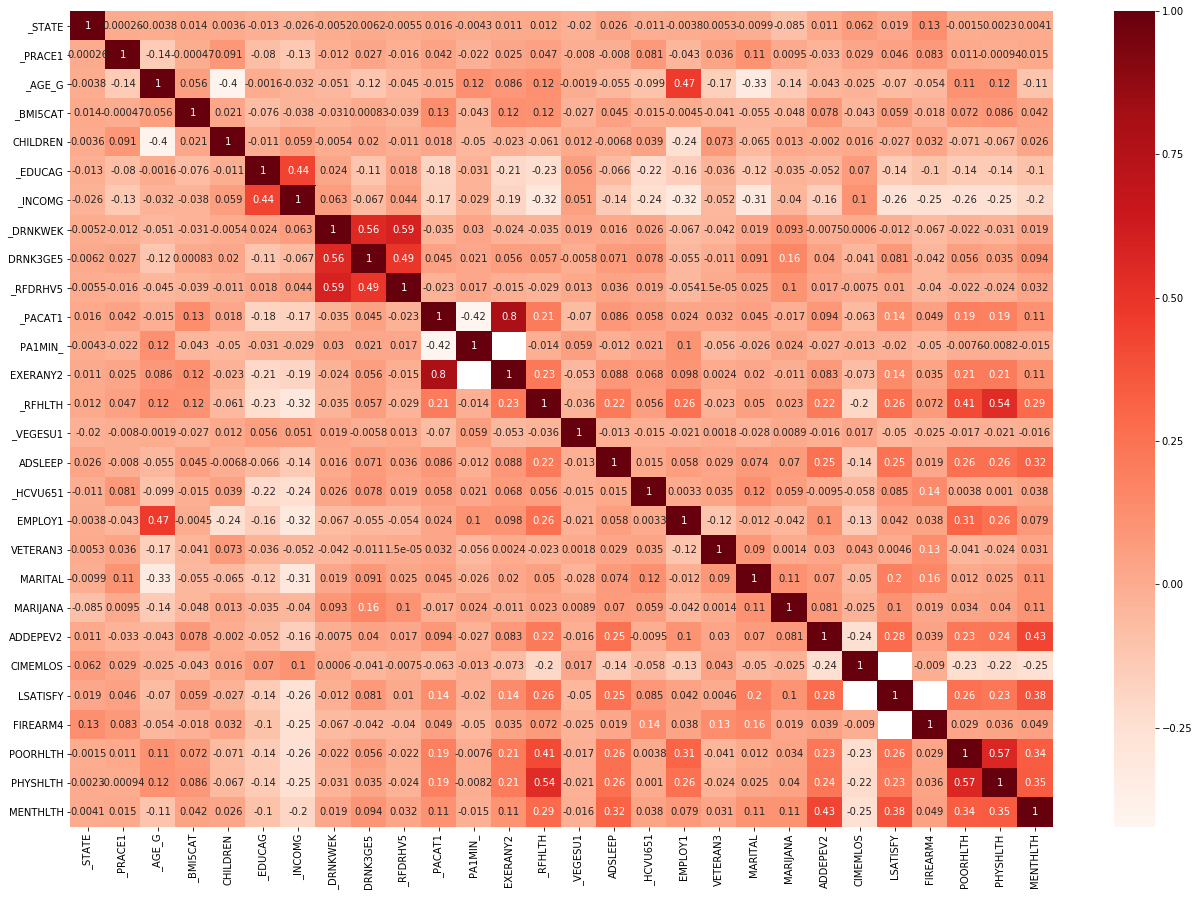

In [38]:
#Using Pearson Correlation

plt.figure(figsize=(22,15))
cor = LLCP.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [39]:
#Correlation with output variable

cor_target = abs(cor["MENTHLTH"])   #Selecting highly correlated features
relevant_features = cor_target[cor_target>0.19]
relevant_features

_INCOMG     0.198435
_RFHLTH     0.288192
ADSLEEP     0.316372
ADDEPEV2    0.431397
CIMEMLOS    0.249232
LSATISFY    0.377597
POORHLTH    0.337791
PHYSHLTH    0.345136
MENTHLTH    1.000000
Name: MENTHLTH, dtype: float64

In [40]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline
!pip install missingno
import missingno as msno

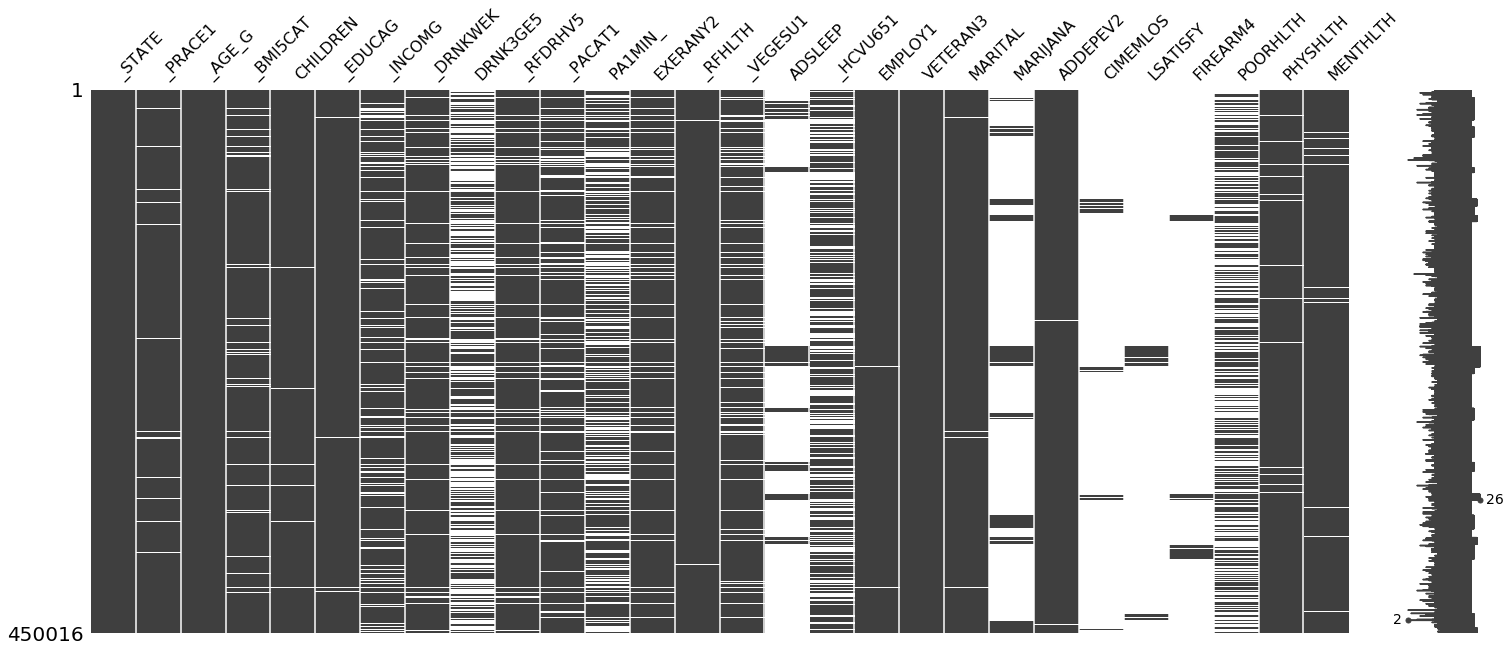

In [41]:
msno.matrix(LLCP)

In [42]:
LLCP2 = LLCP[['_PRACE1', '_AGE_G','_BMI5CAT','CHILDREN','_EDUCAG','_INCOMG','_DRNKWEK','_RFDRHV5','_PACAT1','PA1MIN_','EXERANY2','_RFHLTH','_VEGESU1','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH','MENTHLTH']]
LLCP2.isnull().sum()

_PRACE1      11137
_AGE_G           0
_BMI5CAT     36446
CHILDREN      3563
_EDUCAG       1707
_INCOMG      75085
_DRNKWEK     30066
_RFDRHV5     30180
_PACAT1      52681
PA1MIN_     156652
EXERANY2     34203
_RFHLTH       1149
_VEGESU1     47460
_HCVU651    163884
EMPLOY1       3706
VETERAN3       740
MARITAL       3146
ADDEPEV2      2124
POORHLTH    217498
PHYSHLTH      9331
MENTHLTH      7203
dtype: int64

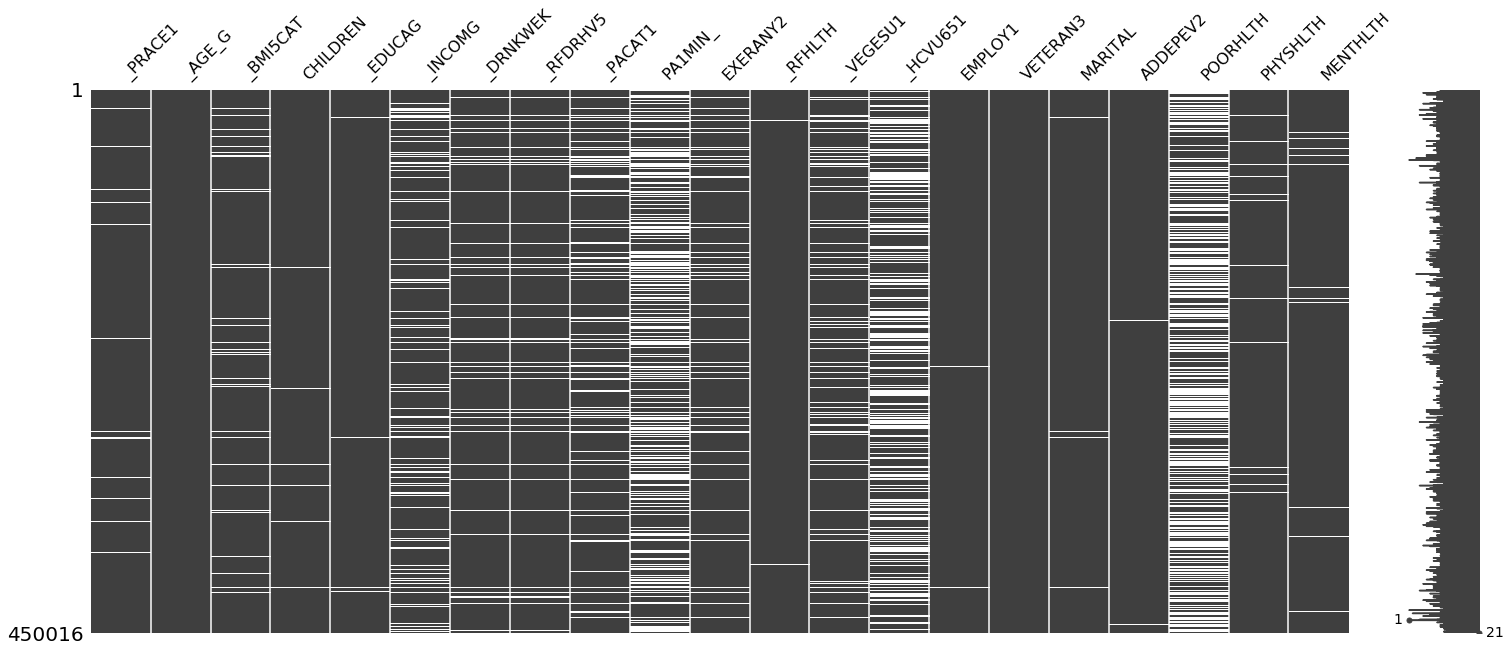

In [43]:
msno.matrix(LLCP2)

In [44]:
LLCP2.describe()

,_PRACE1,_AGE_G,_BMI5CAT,CHILDREN,_EDUCAG,_INCOMG,_DRNKWEK,_RFDRHV5,_PACAT1,PA1MIN_,...,_RFHLTH,_VEGESU1,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH
count,438879.000000,450016.000000,413570.000000,446453.000000,448309.000000,374931.000000,4.199500e+05,419836.000000,397335.000000,2.933640e+05,...,448867.000000,4.025560e+05,286132.000000,446310.000000,449276.000000,446870.000000,447892.000000,232518.000000,440685.000000,442813.000000
mean,1.374518,4.416081,2.965991,0.511904,2.956367,3.748460,2.840325e+02,1.058258,2.457981,4.898493e+02,...,1.192774,2.083922e+02,1.114814,3.862324,1.871197,2.269848,0.199175,5.351973,4.412914,3.595398
std,1.036059,1.583006,0.829725,1.032935,0.968905,1.447313,9.016715e+02,0.234232,1.233341,8.504535e+02,...,0.394478,3.145890e+02,0.318798,2.846585,0.334982,1.632440,0.399381,9.382512,8.895486,7.910237
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.397605e-79,1.000000,1.000000,5.397605e-79,...,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,5.397605e-79,1.000000,1.000000,1.200000e+02,...,1.000000,1.190000e+02,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,5.000000,3.000000,0.000000,3.000000,4.000000,2.300000e+01,1.000000,2.000000,2.700000e+02,...,1.000000,1.720000e+02,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.000000,4.000000,1.000000,4.000000,5.000000,2.330000e+02,1.000000,4.000000,5.500000e+02,...,1.000000,2.430000e+02,1.000000,7.000000,2.000000,3.000000,0.000000,5.000000,3.000000,2.000000
max,7.000000,6.000000,4.000000,23.000000,4.000000,5.000000,5.320000e+04,2.000000,4.000000,8.999000e+04,...,2.000000,2.970700e+04,2.000000,8.000000,2.000000,6.000000,1.000000,30.000000,30.000000,30.000000


In [45]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
LLCP2[['_PRACE1','_BMI5CAT','CHILDREN','_EDUCAG','_INCOMG','_DRNKWEK','_RFDRHV5','_PACAT1','PA1MIN_','EXERANY2','_RFHLTH','_VEGESU1','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH','MENTHLTH']]=imputer.fit_transform(LLCP2[['_PRACE1','_BMI5CAT','CHILDREN','_EDUCAG','_INCOMG','_DRNKWEK','_RFDRHV5','_PACAT1','PA1MIN_','EXERANY2','_RFHLTH','_VEGESU1','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH','MENTHLTH']])

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\frame.py:3395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sel

In [46]:
LLCP2.describe()

,_PRACE1,_AGE_G,_BMI5CAT,CHILDREN,_EDUCAG,_INCOMG,_DRNKWEK,_RFDRHV5,_PACAT1,PA1MIN_,...,_RFHLTH,_VEGESU1,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH
count,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,4.500160e+05,450016.000000,450016.000000,4.500160e+05,...,450016.000000,4.500160e+05,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000
mean,1.365249,4.416081,2.968746,0.507851,2.956533,3.790430,2.665926e+02,1.054351,2.404368,4.133191e+02,...,1.192282,2.045541e+02,1.073002,3.846988,1.871409,2.260971,0.198235,2.765302,4.321413,3.537850
std,1.024811,1.583006,0.795470,1.029837,0.967070,1.324389,8.734652e+02,0.226710,1.168220,6.945976e+02,...,0.394094,2.977480e+02,0.260140,2.839831,0.334747,1.630161,0.398671,7.255185,8.825211,7.859638
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.397605e-79,1.000000,1.000000,5.397605e-79,...,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,0.000000,2.000000,3.000000,5.397605e-79,1.000000,1.000000,1.960000e+02,...,1.000000,1.280000e+02,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,5.000000,3.000000,0.000000,3.000000,4.000000,2.300000e+01,1.000000,2.000000,2.700000e+02,...,1.000000,1.720000e+02,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.000000,4.000000,1.000000,4.000000,5.000000,2.000000e+02,1.000000,4.000000,3.640000e+02,...,1.000000,2.290000e+02,1.000000,7.000000,2.000000,3.000000,0.000000,0.000000,3.000000,2.000000
max,7.000000,6.000000,4.000000,23.000000,4.000000,5.000000,5.320000e+04,2.000000,4.000000,8.999000e+04,...,2.000000,2.970700e+04,2.000000,8.000000,2.000000,6.000000,1.000000,30.000000,30.000000,30.000000


In [47]:
LLCP2.shape

(450016, 21)

In [48]:
LLCP2[['_PRACE1','_BMI5CAT','CHILDREN','_EDUCAG','_INCOMG','_DRNKWEK','_RFDRHV5','_PACAT1','PA1MIN_',
       'EXERANY2','_RFHLTH','_VEGESU1','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH',
       'PHYSHLTH','MENTHLTH']].corr() 

,_PRACE1,_BMI5CAT,CHILDREN,_EDUCAG,_INCOMG,_DRNKWEK,_RFDRHV5,_PACAT1,PA1MIN_,EXERANY2,_RFHLTH,_VEGESU1,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH
_PRACE1,1.000000,-0.000119,0.086020,-0.075287,-0.111368,-0.013819,-0.017212,0.033033,-0.021775,0.016503,0.044297,-0.008706,0.083127,-0.042686,0.035479,0.105666,-0.031527,0.003578,-0.001601,0.014368
_BMI5CAT,-0.000119,1.000000,0.020173,-0.072558,-0.037595,-0.029694,-0.036985,0.123798,-0.047916,0.110770,0.111532,-0.024307,-0.003696,-0.004004,-0.039269,-0.052399,0.074822,0.066407,0.081972,0.040129
CHILDREN,0.086020,0.020173,1.000000,-0.010596,0.050053,-0.005421,-0.010265,0.015821,-0.037403,-0.024754,-0.060388,0.011533,0.101469,-0.239582,0.072596,-0.062860,-0.001147,-0.042548,-0.063549,0.026890
_EDUCAG,-0.075287,-0.072558,-0.010596,1.000000,0.388029,0.027081,0.020790,-0.161810,0.006429,-0.185627,-0.226816,0.056252,-0.163879,-0.154549,-0.035855,-0.123174,-0.051414,-0.110485,-0.132815,-0.095413
_INCOMG,-0.111368,-0.037595,0.050053,0.388029,1.000000,0.056157,0.039942,-0.142223,0.004279,-0.159877,-0.282103,0.045709,-0.154340,-0.279533,-0.046045,-0.273493,-0.147633,-0.209355,-0.216715,-0.176903
_DRNKWEK,-0.013819,-0.029694,-0.005421,0.027081,0.056157,1.000000,0.590760,-0.027317,0.028445,-0.015596,-0.034219,0.019787,0.028009,-0.062497,-0.040505,0.016757,-0.005075,-0.015495,-0.027797,0.018667
_RFDRHV5,-0.017212,-0.036985,-0.010265,0.020790,0.039942,0.590760,1.000000,-0.017791,0.018587,-0.008446,-0.028255,0.014454,0.022699,-0.050439,-0.000404,0.022818,0.018252,-0.009279,-0.021027,0.031309
_PACAT1,0.033033,0.123798,0.015821,-0.161810,-0.142223,-0.027317,-0.017791,1.000000,-0.351318,0.799234,0.193492,-0.063716,0.041370,0.021371,0.028588,0.039245,0.091879,0.158596,0.172062,0.104441
PA1MIN_,-0.021775,-0.047916,-0.037403,0.006429,0.004279,0.028445,0.018587,-0.351318,1.000000,-0.120736,-0.039124,0.056519,-0.013355,0.067732,-0.046093,-0.024004,-0.028847,-0.034667,-0.030963,-0.023776
EXERANY2,0.016503,0.110770,-0.024754,-0.185627,-0.159877,-0.015596,-0.008446,0.799234,-0.120736,1.000000,0.211515,-0.046987,0.030995,0.096517,0.000366,0.016790,0.083193,0.170822,0.191357,0.100746


In [49]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(LLCP2["_PRACE1"], LLCP2["MENTHLTH"])
print("Pearson Corr for _PRACE1 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["_AGE_G"], LLCP2["MENTHLTH"])
print("Pearson Corr for _AGE_G and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_BMI5CAT"], LLCP2["MENTHLTH"])
print("Pearson Corr for _BMI5CAT and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["CHILDREN"], LLCP2["MENTHLTH"])
print("Pearson Corr for CHILDREN and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_EDUCAG"], LLCP2["MENTHLTH"])
print("Pearson Corr for _EDUCAG and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_INCOMG"], LLCP2["MENTHLTH"])
print("Pearson Corr _INCOMG and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_DRNKWEK"], LLCP2["MENTHLTH"])
print("Pearson Corr for _DRNKWEK and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_RFDRHV5"], LLCP2["MENTHLTH"])
print("Pearson Corr for _RFDRHV5 and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_PACAT1"], LLCP2["MENTHLTH"])
print("Pearson Corr for _PACAT1 and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["PA1MIN_"], LLCP2["MENTHLTH"])
print("Pearson Corr for PA1MIN_ and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["EXERANY2"], LLCP2["MENTHLTH"])
print("Pearson Corr for EXERANY2 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["_RFHLTH"], LLCP2["MENTHLTH"])
print("Pearson Corr for _RFHLTH and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["_VEGESU1"], LLCP2["MENTHLTH"])
print("Pearson Corr for _VEGESU1 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["_HCVU651"], LLCP2["MENTHLTH"])
print("Pearson Corr for _HCVU651 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["EMPLOY1"], LLCP2["MENTHLTH"])
print("Pearson Corr for EMPLOY1 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["VETERAN3"], LLCP2["MENTHLTH"])
print("Pearson Corr for VETERAN3 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["MARITAL"], LLCP2["MENTHLTH"])
print("Pearson Corr for MARITAL and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["ADDEPEV2"], LLCP2["MENTHLTH"])
print("Pearson Corr for ADDEPEV2 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["POORHLTH"], LLCP2["MENTHLTH"])
print("Pearson Corr for POORHLTH and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["PHYSHLTH"], LLCP2["MENTHLTH"])
print("Pearson Corr for PHYSHLTH and MENTHLTH is", pearson_coef, " with p =", p_value)

Pearson Corr for _PRACE1 and MENTHLTH is 0.014367963841357568  with p = 5.473694691169941e-22
Pearson Corr for _AGE_G and MENTHLTH is -0.10887893602713436  with p = 0.0
Pearson Corr for _BMI5CAT and MENTHLTH is 0.04012942370485728  with p = 9.552874717864089e-160
Pearson Corr for CHILDREN and MENTHLTH is 0.026889932353189337  with p = 9.143513185986028e-73
Pearson Corr for _EDUCAG and MENTHLTH is -0.09541261307235983  with p = 0.0
Pearson Corr _INCOMG and MENTHLTH is -0.17690316052408112  with p = 0.0
Pearson Corr for _DRNKWEK and MENTHLTH is 0.018666595052040064  with p = 5.573357314314397e-36
Pearson Corr for _RFDRHV5 and MENTHLTH is 0.031309247097921496  with p = 5.5017441912159066e-98
Pearson Corr for _PACAT1 and MENTHLTH is 0.10444108764504574  with p = 0.0
Pearson Corr for PA1MIN_ and MENTHLTH is -0.023775749607517084  with p = 2.77016842304989e-57
Pearson Corr for EXERANY2 and MENTHLTH is 0.10074648604531723  with p = 0.0
Pearson Corr for _RFHLTH and MENTHLTH is 0.27949134204642

In [50]:
X1 = LLCP2.drop("MENTHLTH",1)   #Feature Matrix
y1 = LLCP2["MENTHLTH"]          #Target Variable

In [51]:
model = LinearRegression()  #Initializing RFE model
rfe = RFE(model, 21)  #Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y1)  #Fitting the data to model
model.fit(X_rfe,y1)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [52]:
#no of features
nof_list=np.arange(1,14)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 13
Score with 13 features: 0.312887


In [53]:
cols = list(X1.columns)
model = LinearRegression()       #Initializing RFE model
rfe = RFE(model, 13)             #Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y1)   #Fitting the data to model
model.fit(X_rfe,y1)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['_AGE_G', '_BMI5CAT', '_EDUCAG', '_INCOMG', '_RFDRHV5', 'EXERANY2',
       '_RFHLTH', '_HCVU651', 'VETERAN3', 'MARITAL', 'ADDEPEV2', 'POORHLTH',
       'PHYSHLTH'],
      dtype='object')


In [54]:
reg = LassoCV(max_iter=10000, cv=3)
reg.fit(X1, y1)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X1,y1))
coef = pd.Series(reg.coef_, index = X1.columns)

Best alpha using built-in LassoCV: 0.129798
Best score using built-in LassoCV: 0.302890


In [55]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 11 variables and eliminated the other 9 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

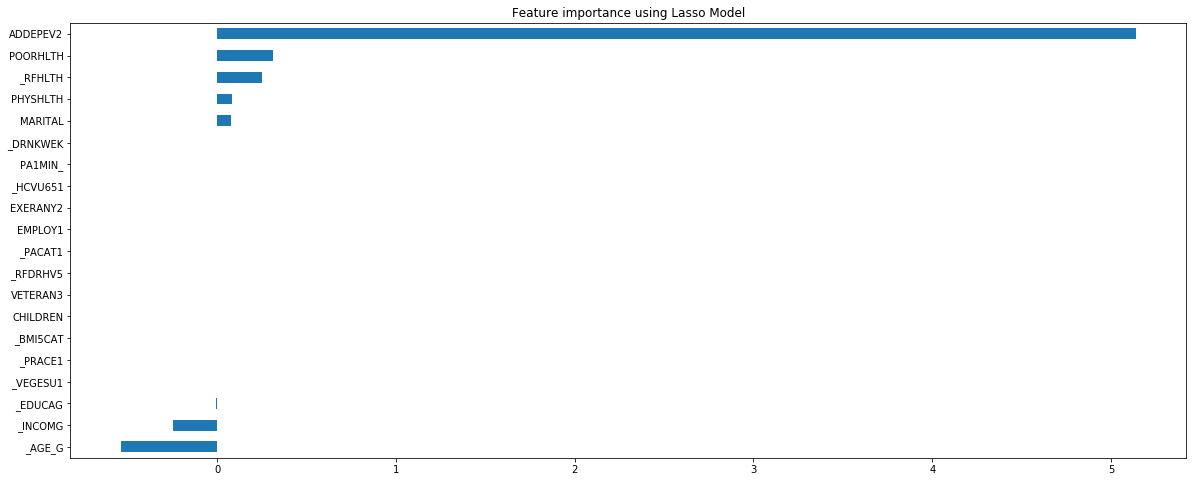

In [56]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [57]:
LLCP2[['_AGE_G', '_EDUCAG','_INCOMG', 'EXERANY2','_RFHLTH', 'MARITAL', 'ADDEPEV2', 'POORHLTH',
       'PHYSHLTH','MENTHLTH']].corr()

,_AGE_G,_EDUCAG,_INCOMG,EXERANY2,_RFHLTH,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH
_AGE_G,1.000000,-0.001620,-0.025433,0.087881,0.120966,-0.330268,-0.042975,0.048511,0.111096,-0.108879
_EDUCAG,-0.001620,1.000000,0.388029,-0.185627,-0.226816,-0.123174,-0.051414,-0.110485,-0.132815,-0.095413
_INCOMG,-0.025433,0.388029,1.000000,-0.159877,-0.282103,-0.273493,-0.147633,-0.209355,-0.216715,-0.176903
EXERANY2,0.087881,-0.185627,-0.159877,1.000000,0.211515,0.016790,0.083193,0.170822,0.191357,0.100746
_RFHLTH,0.120966,-0.226816,-0.282103,0.211515,1.000000,0.049937,0.219051,0.422461,0.520753,0.279491
MARITAL,-0.330268,-0.123174,-0.273493,0.016790,0.049937,1.000000,0.069595,0.041972,0.022929,0.107036
ADDEPEV2,-0.042975,-0.051414,-0.147633,0.083193,0.219051,0.069595,1.000000,0.287696,0.229652,0.420316
POORHLTH,0.048511,-0.110485,-0.209355,0.170822,0.422461,0.041972,0.287696,1.000000,0.617509,0.430670
PHYSHLTH,0.111096,-0.132815,-0.216715,0.191357,0.520753,0.022929,0.229652,0.617509,1.000000,0.334281
MENTHLTH,-0.108879,-0.095413,-0.176903,0.100746,0.279491,0.107036,0.420316,0.430670,0.334281,1.000000


In [58]:
X = LLCP2[['ADDEPEV2','POORHLTH','PHYSHLTH']].values

y = LLCP2['MENTHLTH'].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
coeff_df = pd.DataFrame(regressor.coef_) 
coeff_df

,0
0,6.246670
1,0.310757
2,0.074541


In [62]:
y_pred = regressor.predict(X_test)

In [63]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
 
df.head(15)

,Actual,Predicted
0,0.0,1.116285
1,0.0,3.352522
2,14.0,10.060039
3,0.0,8.742472
4,0.0,3.352522
5,0.0,1.116285
6,0.0,1.116285
7,0.0,1.414450
8,3.0,2.048555
9,0.0,1.116285


In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error-MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Square Error-RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance Score:', regressor.score(X, y))
print('R Squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 3.9208253396262944
Mean Squared Error-MSE: 44.02775605520589
Root Mean Square Error-RMSE: 6.635341442247406
Explained Variance Score: 0.28557639403125334
R Squared: 0.29061938667512743
